In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from datetime import datetime
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, balanced_accuracy_score, confusion_matrix, classification_report, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
from sklearn.utils import resample
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


\<div style="text-align: center; background-color: pink; padding: 10px;">
    <h2 style="font-weight: bold;">PHÂN TÍCH XU HƯỚNG NGƯỜI DÙNG TRÊN FANPAGE FACEBOOK
    </h2>
</div>

***Dữ liệu thu về được từ fanpage về phim trên facebook***

In [ ]:
path= "/content/drive/MyDrive/Dataset/File12.csv"
df = pd.read_csv (path)
df.head()

,ID bài viết,ID Trang,Tên Trang,Tiêu đề,Mô tả,Thời lượng (giây),Thời gian đăng,Loại chú thích,Liên kết vĩnh viễn,Là nội dung đăng chéo,...,"Lượt xem theo đối tượng liên quan nhất (F, 35-44)","Lượt xem theo đối tượng liên quan nhất (M, 18-24)","Lượt xem theo đối tượng liên quan nhất (M, 25-34)","Lượt xem theo đối tượng liên quan nhất (F, 45-54)","Lượt xem theo đối tượng liên quan nhất (M, 35-44)","Lượt xem theo đối tượng liên quan nhất (F, 55-64)","Lượt xem theo đối tượng liên quan nhất (M, 45-54)","Lượt xem theo đối tượng liên quan nhất (F, 65+)","Lượt xem theo đối tượng liên quan nhất (M, 65+)","Lượt xem theo đối tượng liên quan nhất (M, 55-64)"
0,9.200000e+14,1.010000e+14,Fanpage,NaN,Thấy ảnh flex mà t mắc cở dùm luôn á \n\n#Quee...,0,03/17/2024 19:00,NaN,https://www.facebook.com/FCHuongQuocvn/posts/p...,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,9.210000e+14,1.010000e+14,Fanpage,NaN,Giá mà ngày nào chị cũng thế này thì Huyn Woo ...,45,03/17/2024 20:28,NaN,https://www.facebook.com/FCHuongQuocvn/posts/p...,0,...,16286.0,7527.0,7843.0,1063.0,1675.0,166.0,196.0,269.0,79.0,53.0
2,9.210000e+14,1.010000e+14,Fanpage,NaN,Vợ ông em có vẻ không phải dạng vừa đâu,84,03/17/2024 21:08,NaN,https://www.facebook.com/FCHuongQuocvn/posts/p...,0,...,28161.0,10362.0,11268.0,1708.0,2803.0,248.0,310.0,327.0,117.0,60.0
3,9.210000e+14,1.010000e+14,Fanpage,NaN,Ep 5 tuần sau kiểu :(\nNữ hoàng nước mắt là ng...,0,03/17/2024 20:57,NaN,https://www.facebook.com/FCHuongQuocvn/posts/p...,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,9.210000e+14,1.010000e+14,Fanpage,NaN,[SPOIL EP 4] HyunWoo và Haein đã từng có con v...,0,03/18/2024 21:22,NaN,https://www.facebook.com/FCHuongQuocvn/posts/p...,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1256 entries, 0 to 1255
Data columns (total 71 columns):
 #   Column                                                                            Non-Null Count  Dtype  
---  ------                                                                            --------------  -----  
 0   ID bài viết                                                                       1256 non-null   float64
 1   ID Trang                                                                          1256 non-null   float64
 2   Tên Trang                                                                         1256 non-null   object 
 3   Tiêu đề                                                                           82 non-null     object 
 4   Mô tả                                                                             1255 non-null   object 
 5   Thời lượng (giây)                                                                 1256 non-null   int64  
 6   

***Dữ liệu gồm 70 features và 1256 row***




# 1. Tiền xử lý dữ





***Loại bỏ các features không sử dụng***


In [ ]:
print("Các cột trước khi loại bỏ:")
print(df.columns)

Các cột trước khi loại bỏ:
Index(['ID bài viết', 'ID Trang', 'Tên Trang', 'Tiêu đề', 'Mô tả',
       'Thời lượng (giây)', 'Thời gian đăng', 'Loại chú thích',
       'Liên kết vĩnh viễn', 'Là nội dung đăng chéo', 'Là bài viết chia sẻ',
       'Loại bài viết', 'Ngôn ngữ', 'Nhãn tùy chỉnh',
       'Trạng thái nội dung được tài trợ', 'Bình luận về dữ liệu', 'Ngày',
       'Lượt hiển thị', 'Số người tiếp cận',
       'Cảm xúc, bình luận và lượt chia sẻ', 'Cảm xúc', 'Bình luận',
       'Lượt chia sẻ', 'Số phản hồi tiêu cực từ người dùng: Ẩn tất cả',
       'Số phản hồi tiêu cực từ người dùng: Ẩn', 'Tổng số lượt click',
       'Lượt click khác',
       'Tổng số lượt click của người dùng khớp với đối tượng nhắm mục tiêu (Photo Click)',
       'Lượt click vào liên kết', 'Lượt hiển thị từ Bài viết tự nhiên',
       'Lượt hiển thị từ Bài viết đã quảng cáo',
       'Số người tiếp cận từ Bài viết tự nhiên',
       'Số người tiếp cận từ Bài viết đã quảng cáo',
       'Lượt xem video trong tối thiểu 

In [ ]:
cols_to_drop =[ 'ID bài viết', 'ID Trang', 'Tên Trang', 'Tiêu đề','Thời lượng (giây)', 'Mô tả', 'Loại chú thích',
       'Liên kết vĩnh viễn', 'Là nội dung đăng chéo', 'Là bài viết chia sẻ', 'Ngôn ngữ', 'Nhãn tùy chỉnh',
       'Trạng thái nội dung được tài trợ', 'Bình luận về dữ liệu', 'Ngày',
       'Lượt hiển thị','Cảm xúc', 'Bình luận',
       'Lượt chia sẻ', 'Số phản hồi tiêu cực từ người dùng: Ẩn tất cả',
       'Số phản hồi tiêu cực từ người dùng: Ẩn', 'Lượt click khác',
       'Tổng số lượt click của người dùng khớp với đối tượng nhắm mục tiêu (Photo Click)',
       'Lượt click vào liên kết', 'Lượt hiển thị từ Bài viết tự nhiên',
       'Lượt hiển thị từ Bài viết đã quảng cáo',
       'Số người tiếp cận từ Bài viết tự nhiên',
       'Số người tiếp cận từ Bài viết đã quảng cáo',
       'Lượt xem video trong tối thiểu 3 giây',
       'Lượt xem video trong tối thiểu 1 phút',
       'Số người xem trong tối thiểu 3 giây',
       'Số người xem trong tối thiểu 1 phút',
       'Lượt xem video trong tối thiểu 3 giây từ Bài viết đã quảng cáo',
       'Lượt xem video trong tối thiểu 3 giây từ Bài viết tự nhiên',
       'Lượt xem video trong tối thiểu 1 phút từ Đề xuất',
       'Lượt xem video trong tối thiểu 1 phút từ Lượt chia sẻ',
       'Lượt xem video trong tối thiểu 1 phút từ Người theo dõi',
       'Lượt xem video trong tối thiểu 1 phút từ Bài viết đã quảng cáo',
       'Số Giây xem từ Đề xuất', 'Số Giây xem từ Lượt chia sẻ',
       'Số Giây xem từ Người theo dõi', 'Số Giây xem từ Bài viết đã quảng cáo',
       'Số Giây xem trung bình từ Đề xuất',
       'Số Giây xem trung bình từ Lượt chia sẻ',
       'Số Giây xem trung bình từ Người theo dõi',
       'Số Giây xem trung bình từ Bài viết đã quảng cáo', 'Số phản hồi tiêu cực từ người dùng',
       'Số phản hồi tiêu cực của người dùng', 'Số Giây xem',
       'Số Giây xem trung bình', 'Thu nhập ước tính ((USD))',
       'CPM quảng cáo ((USD))', 'Lượt hiển thị quảng cáo',
       'Lượt xem theo đối tượng liên quan nhất (F, 18-24)',
       'Lượt xem theo đối tượng liên quan nhất (F, 25-34)',
       'Lượt xem theo đối tượng liên quan nhất (F, 35-44)',
       'Lượt xem theo đối tượng liên quan nhất (M, 18-24)',
       'Lượt xem theo đối tượng liên quan nhất (M, 25-34)',
       'Lượt xem theo đối tượng liên quan nhất (F, 45-54)',
       'Lượt xem theo đối tượng liên quan nhất (M, 35-44)',
       'Lượt xem theo đối tượng liên quan nhất (F, 55-64)',
       'Lượt xem theo đối tượng liên quan nhất (M, 45-54)',
       'Lượt xem theo đối tượng liên quan nhất (F, 65+)',
       'Lượt xem theo đối tượng liên quan nhất (M, 65+)',
       'Lượt xem theo đối tượng liên quan nhất (M, 55-64)']

In [ ]:
df = df.drop(columns=cols_to_drop)

# Hiển thị các cột sau khi loại bỏ
print("Các cột còn lại sau khi loại bỏ:")
print(df.columns)
df.head()

Các cột còn lại sau khi loại bỏ:
Index(['Thời gian đăng', 'Loại bài viết', 'Số người tiếp cận',
       'Cảm xúc, bình luận và lượt chia sẻ', 'Tổng số lượt click',
       'Người dùng đã tương tác'],
      dtype='object')


,Thời gian đăng,Loại bài viết,Số người tiếp cận,"Cảm xúc, bình luận và lượt chia sẻ",Tổng số lượt click,Người dùng đã tương tác
0,03/17/2024 19:00,Ảnh,50773.0,NaN,4382.0,4588.0
1,03/17/2024 20:28,Video,258958.0,5934.0,12647.0,17030.0
2,03/17/2024 21:08,Video,315843.0,5643.0,28243.0,31086.0
3,03/17/2024 20:57,Ảnh,234696.0,4230.0,17071.0,18083.0
4,03/18/2024 21:22,Ảnh,108932.0,2727.0,13886.0,15025.0


***Đổi tên các thuộc tính***

In [ ]:
#Đổi tên các thuộc tính
df.rename(columns={'Thời gian đăng': 'TGĐang', 'Loại bài viết': 'LoaiBaiViet','Số người tiếp cận': 'SoNguoiTC',
                 'Cảm xúc, bình luận và lượt chia sẻ': 'TongCXBLCS', 'Tổng số lượt click': 'TongLC',
       'Người dùng đã tương tác':'TongNTT'}, inplace=True)
# Hiển thị DataFrame sau khi đổi tên
df.head()

,TGĐang,LoaiBaiViet,SoNguoiTC,TongCXBLCS,TongLC,TongNTT
0,03/17/2024 19:00,Ảnh,50773.0,NaN,4382.0,4588.0
1,03/17/2024 20:28,Video,258958.0,5934.0,12647.0,17030.0
2,03/17/2024 21:08,Video,315843.0,5643.0,28243.0,31086.0
3,03/17/2024 20:57,Ảnh,234696.0,4230.0,17071.0,18083.0
4,03/18/2024 21:22,Ảnh,108932.0,2727.0,13886.0,15025.0


***Sắp xếp các thuộc tính***

In [ ]:
#Sắp xếp các thuộc tính
frame = df[['LoaiBaiViet','TGĐang','SoNguoiTC','TongLC','TongNTT','TongCXBLCS']]
frame.head()

,LoaiBaiViet,TGĐang,SoNguoiTC,TongLC,TongNTT,TongCXBLCS
0,Ảnh,03/17/2024 19:00,50773.0,4382.0,4588.0,NaN
1,Video,03/17/2024 20:28,258958.0,12647.0,17030.0,5934.0
2,Video,03/17/2024 21:08,315843.0,28243.0,31086.0,5643.0
3,Ảnh,03/17/2024 20:57,234696.0,17071.0,18083.0,4230.0
4,Ảnh,03/18/2024 21:22,108932.0,13886.0,15025.0,2727.0


In [ ]:
frame.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1256 entries, 0 to 1255
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LoaiBaiViet  1256 non-null   object 
 1   TGĐang       1256 non-null   object 
 2   SoNguoiTC    1227 non-null   float64
 3   TongLC       1207 non-null   float64
 4   TongNTT      1250 non-null   float64
 5   TongCXBLCS   1206 non-null   float64
dtypes: float64(4), object(2)
memory usage: 59.0+ KB


***Kiểm tra và xử lý dữ liệu trùng***

In [ ]:
duplicated_data = frame[frame.duplicated()]
if duplicated_data.empty:
    print("Không có dữ liệu bị trùng.")
else:
    print("Dữ liệu bị trùng:")
    print(duplicated_data)

Dữ liệu bị trùng:
     LoaiBaiViet            TGĐang  SoNguoiTC     TongLC    TongNTT  \
130        Video  02/28/2024 12:44    26632.0     1444.0     1711.0   
1249       Video  11/02/2023 15:00    32112.0     1189.0     1707.0   
1253         Ảnh  11/01/2023 12:00  5313389.0  1196629.0  1007106.0   
1254         Ảnh  11/02/2023 18:54    33776.0     1087.0     1595.0   
1255         Ảnh  11/04/2023 18:00    69804.0     4787.0     6748.0   

      TongCXBLCS  
130        483.0  
1249       741.0  
1253    165344.0  
1254       736.0  
1255      3301.0  


In [ ]:
frame.drop_duplicates(inplace=True)

# Kiểm tra lại xem có dữ liệu bị trùng nữa không
if frame.duplicated().any():
    print("Có vẫn còn dữ liệu bị trùng sau khi xoá.")
else:
    print("Không còn dữ liệu bị trùng sau khi xoá.")

Không còn dữ liệu bị trùng sau khi xoá.


***Lọc dữ liệu với điều kiện thể loại bài viết là Ảnh và Video***

In [ ]:
#lọc dữ liệu
df1 = frame[frame['LoaiBaiViet'].isin(['Ảnh', 'Video'])]


In [ ]:
# Reset index
df1 = df1.reset_index(drop=True)

In [ ]:
df1.head()

,LoaiBaiViet,TGĐang,SoNguoiTC,TongLC,TongNTT,TongCXBLCS
0,Ảnh,03/17/2024 19:00,50773.0,4382.0,4588.0,NaN
1,Video,03/17/2024 20:28,258958.0,12647.0,17030.0,5934.0
2,Video,03/17/2024 21:08,315843.0,28243.0,31086.0,5643.0
3,Ảnh,03/17/2024 20:57,234696.0,17071.0,18083.0,4230.0
4,Ảnh,03/18/2024 21:22,108932.0,13886.0,15025.0,2727.0


***Kiểm tra và điền vào giá trị null***

In [ ]:
df1.isnull()


,LoaiBaiViet,TGĐang,SoNguoiTC,TongLC,TongNTT,TongCXBLCS
0,False,False,False,False,False,True
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
1245,False,False,False,False,False,False
1246,False,False,False,False,False,False
1247,False,False,False,False,False,False
1248,False,False,False,False,False,False


In [ ]:
# Tính giá trị trung bình của cột AB
mean_AB = df1['SoNguoiTC'].mean()

# Điền giá trị trung bình vào những ô trống trong cột AB
df1['SoNguoiTC'].fillna(mean_AB, inplace=True)

In [ ]:
# Tính giá trị trung bình của cột AB
mean_AB = df1['TongLC'].mean()

# Điền giá trị trung bình vào những ô trống trong cột AB
df1['TongLC'].fillna(mean_AB, inplace=True)

In [ ]:
# Tính giá trị trung bình của cột AB
mean_AB = df1['TongNTT'].mean()

# Điền giá trị trung bình vào những ô trống trong cột AB
df1['TongNTT'].fillna(mean_AB, inplace=True)

In [ ]:
# Tính giá trị trung bình của cột AB
mean_AB = df1['TongCXBLCS'].mean()

# Điền giá trị trung bình vào những ô trống trong cột AB
df1['TongCXBLCS'].fillna(mean_AB, inplace=True)

In [ ]:
df1.head()

,LoaiBaiViet,TGĐang,SoNguoiTC,TongLC,TongNTT,TongCXBLCS
0,Ảnh,03/17/2024 19:00,50773.0,4382.0,4588.0,6883.051667
1,Video,03/17/2024 20:28,258958.0,12647.0,17030.0,5934.000000
2,Video,03/17/2024 21:08,315843.0,28243.0,31086.0,5643.000000
3,Ảnh,03/17/2024 20:57,234696.0,17071.0,18083.0,4230.000000
4,Ảnh,03/18/2024 21:22,108932.0,13886.0,15025.0,2727.000000


In [ ]:
# Chuyển đổi cột 'TGĐang' sang giờ đăng
df1['TGĐang'] = df1['TGĐang'].apply(lambda x: datetime.strptime(x, '%m/%d/%Y %H:%M').strftime('%H:%M'))

df1.head()

,LoaiBaiViet,TGĐang,SoNguoiTC,TongLC,TongNTT,TongCXBLCS
0,Ảnh,19:00,50773.0,4382.0,4588.0,6883.051667
1,Video,20:28,258958.0,12647.0,17030.0,5934.000000
2,Video,21:08,315843.0,28243.0,31086.0,5643.000000
3,Ảnh,20:57,234696.0,17071.0,18083.0,4230.000000
4,Ảnh,21:22,108932.0,13886.0,15025.0,2727.000000


In [ ]:
output_path = "/content/drive/MyDrive/Dataset/DataPTDL.csv"
df1.to_csv(output_path, index=False, encoding='utf-8-sig')
print(f"CSV file saved successfully to: {output_path}")


# 2. Mô hình dự đoán

In [ ]:
df1.LoaiBaiViet.value_counts()


LoaiBaiViet
Ảnh      836
Video    414
Name: count, dtype: int64

***Cân bằng dữ liệu***

In [ ]:
X = df1[['SoNguoiTC','TongNTT']]  # Các đặc trưng (biến độc lập)
y = df1['LoaiBaiViet']  # Mục tiêu (biến phụ thuộc)
# Chuyển đổi nhãn thành số (nếu cần)
y = y.map({'Ảnh': 0, 'Video': 1})
# Cân bằng dữ liệu bằng RandomUnderSampler
undersampler = RandomUnderSampler(random_state=0)
X_res, y_res = undersampler.fit_resample(X, y)


# Kiểm tra số lượng mẫu sau khi cân bằng
print(y_res.value_counts())

LoaiBaiViet
0    414
1    414
Name: count, dtype: int64


#2.1 Mô hình Decision Trees




In [ ]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res,train_size = 0.8, test_size=0.2, random_state=0)

In [ ]:
# Huấn luyện mô hình
model = DecisionTreeClassifier(random_state=0)
model.fit(X_train, y_train)

# Dự đoán
y_pred = model.predict(X_test)

#Đánh giá mô hình
print(confusion_matrix(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print("Classification Report:\n",classification_report(y_test, y_pred))

[[49 32]
 [41 44]]
Accuracy: 0.5602409638554217
Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.60      0.57        81
           1       0.58      0.52      0.55        85

    accuracy                           0.56       166
   macro avg       0.56      0.56      0.56       166
weighted avg       0.56      0.56      0.56       166



In [ ]:
predictions_df = pd.DataFrame({
    "Predicted ": y_pred
})

# Print the DataFrame
print(predictions_df)

     Predicted 
0             1
1             1
2             1
3             1
4             1
..          ...
161           0
162           1
163           1
164           0
165           0

[166 rows x 1 columns]


***Ma trận nhầm lẫn***

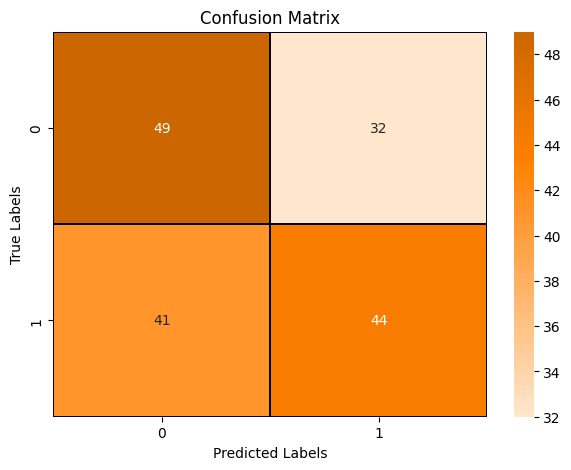

In [ ]:
from matplotlib.colors import LinearSegmentedColormap
# Tính toán ma trận nhầm lẫn
cm = confusion_matrix(y_test, y_pred)

# Tạo màu tùy chỉnh cho màu hồng
colors = ["#ffe6cc", "#ffcc99", "#ffb366", "#ff9933", "#ff8000", "#e67300", "#cc6600"]
cmap = LinearSegmentedColormap.from_list("custom_pastel_orange", colors, N=100)

# Tạo biểu đồ ma trận nhầm lẫn với seaborn
plt.figure(figsize=(7, 5))
sns.heatmap(cm,annot=True,  fmt="d", cmap=cmap, cbar=True, linewidths=0.3, linecolor='black')

# Thêm tiêu đề và nhãn
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Hiển thị biểu đồ
plt.show()

#2.2 Mô hình Random Forest

In [ ]:
# Khởi tạo mô hình Random Forest
rf_model = RandomForestClassifier(random_state=1)

# Huấn luyện mô hình
rf_model.fit(X_train, y_train)

# Dự đoán
y_pred_rf = rf_model.predict(X_test)

# Đánh giá mô hình
print(confusion_matrix(y_test, y_pred_rf))
accuracy = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", accuracy)
print("Classification Report:\n",classification_report(y_test, y_pred_rf))


[[48 33]
 [36 49]]
Accuracy: 0.5843373493975904
Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.59      0.58        81
           1       0.60      0.58      0.59        85

    accuracy                           0.58       166
   macro avg       0.58      0.58      0.58       166
weighted avg       0.58      0.58      0.58       166



In [ ]:
predictions_df = pd.DataFrame({
    "Predicted ": y_pred_rf
})

# Print the DataFrame
print(predictions_df)

     Predicted 
0             1
1             0
2             1
3             1
4             1
..          ...
161           0
162           1
163           1
164           0
165           0

[166 rows x 1 columns]


***Ma trận nhầm lẫn***

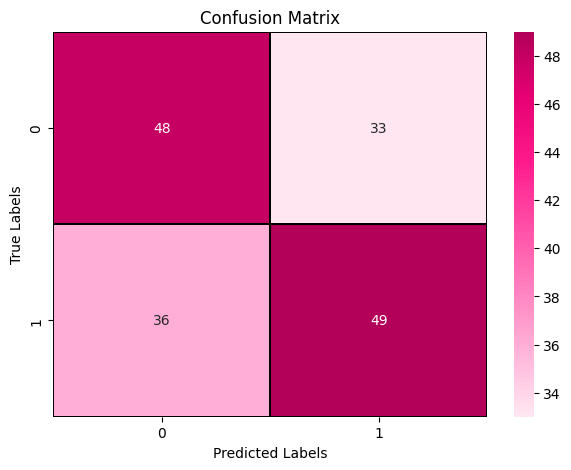

In [ ]:
from matplotlib.colors import LinearSegmentedColormap
# Tính toán ma trận nhầm lẫn
cm = confusion_matrix(y_test, y_pred_rf)

# Tạo màu tùy chỉnh cho màu hồng
colors = ["#ffe6f0", "#ffb3d9", "#ff80bf", "#ff4da6", "#ff1a8c", "#e60073", "#b30059"]
cmap = LinearSegmentedColormap.from_list("custom_pink", colors, N=100)

# Tạo biểu đồ ma trận nhầm lẫn với seaborn
plt.figure(figsize=(7, 5))
sns.heatmap(cm,annot=True,  fmt="d", cmap=cmap, cbar=True, linewidths=0.3, linecolor='black')

# Thêm tiêu đề và nhãn
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Hiển thị biểu đồ
plt.show()




***So sánh 2 mô hình***

In [ ]:
results = pd.DataFrame({
    'Model': ['Decision Tree', 'Random Forest'],
    'Accuracy': [accuracy_score(y_test, y_pred),accuracy_score(y_test, y_pred_rf)],
    'Precision':[precision_score(y_test, y_pred) ,precision_score(y_test, y_pred_rf)],
    'Recall':[recall_score(y_test, y_pred),recall_score(y_test, y_pred_rf) ],
    'F1-Score':[f1_score(y_test, y_pred), f1_score(y_test, y_pred_rf)]
})
print(results)

           Model  Accuracy  Precision    Recall  F1-Score
0  Decision Tree  0.560241   0.578947  0.517647  0.546584
1  Random Forest  0.584337   0.597561  0.576471  0.586826



***Kết luận: cả 2 mô hình này đều có thể áp dụng đc nhưng độ chính xác ko đạt mức tối đa do bài toán này phức tạp và bộ dữ liệu khá chủ quan nên chỉ có 2 mô hình này tạm đáp ứng mức 56% - 58%***



---

